In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder


In [11]:
df = sb.load_dataset("iris")
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df = df.drop_duplicates()
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [12]:
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
#Split data into train-test sets.
from sklearn.model_selection import train_test_split

x = df.drop("species", axis=1)
y = df["species"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)


In [52]:
x_train.shape

(120, 4)

In [55]:
x_test.shape

(30, 4)

In [53]:
y_train.shape


(120,)

In [54]:
y_test.shape

(30,)

In [71]:
from sklearn.linear_model import LinearRegression
srm = LinearRegression()
srm.fit(df[['sepal_length']], df['species'])

srm.predict([[4.9]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.26965955])

In [45]:
# Fit a Linear Regression model using sklearn.linear_model.

from sklearn.linear_model import LinearRegression
model =  LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [46]:
#check model accurecy
model.score(x_test, y_test)

0.9468960016420045

In [60]:
pred = model.predict(x_test)
pred.shape

(30,)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mea = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print("MAE: ", mea)
print("MSE: ", mse)
print("R2: ", r2)

MAE:  0.14637694965308526
MSE:  0.03711379440797686
R2:  0.9468960016420045


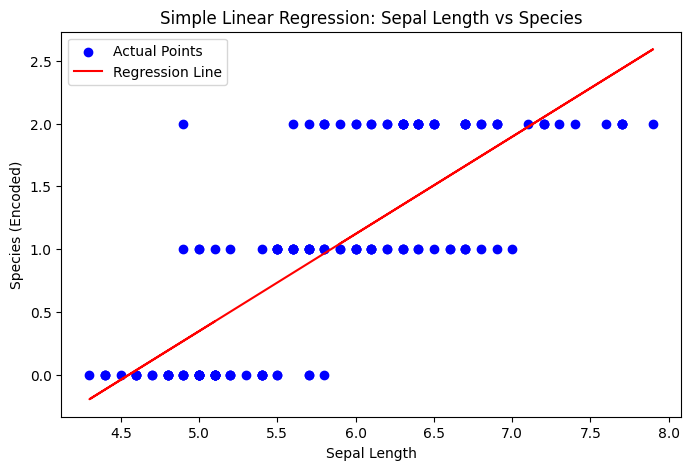

In [72]:
import matplotlib.pyplot as plt

y_pred_line = srm.predict(df[['sepal_length']])

plt.figure(figsize=(8,5))
plt.scatter(df['sepal_length'], df['species'], color='blue', label="Actual Points")
plt.plot(df['sepal_length'], y_pred_line, color='red', label="Regression Line")

plt.xlabel("Sepal Length")
plt.ylabel("Species (Encoded)")
plt.title("Simple Linear Regression: Sepal Length vs Species")
plt.legend()
plt.show()


In [73]:
print("Slope:", srm.coef_[0])
print("Intercept:", srm.intercept_)


Slope: 0.774212492455262
Intercept: -3.5239816642469144
